$
\newcommand{\Tau}{\mathcal{T}}
\newcommand{\bm}[1]{{\boldsymbol{#1}}}
\newcommand{\dt}[1]{{\frac{d#1}{dt}}}
%\newcommand{\bm}{\mathbf{#1}}
\newcommand{\trsp}{{\scriptscriptstyle\top}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pbdlib as pbd
from pbdlib.utils.jupyter_utils import *
np.set_printoptions(precision=2)

# Hidden Markov Model (HMM)

In [14]:
from scipy.io import loadmat # loading data from matlab

letter_in = 'X' # choose a letter in the alphabet
letter_out = 'B' # choose a letter in the alphabet

data_in = loadmat('2Dletters/%s.mat' % letter_in)
data_out = loadmat('2Dletters/%s.mat' % letter_out)

demos_in = [d['pos'][0][0].T for d in data_in['demos'][0]] # cleaning awful matlab data
demos_out = [d['pos'][0][0].T for d in data_out['demos'][0]] # cleaning awful matlab data


demos = [np.concatenate([d_in, d_out], axis=1) for d_in, d_out in zip(demos_in, demos_out)]

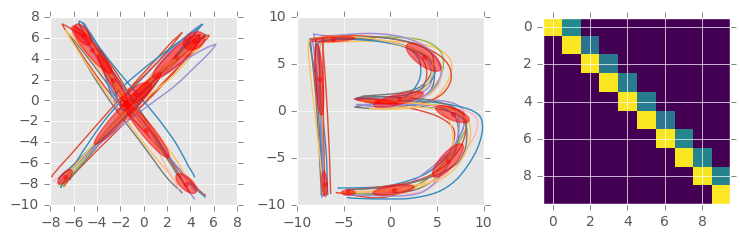

In [19]:
model = pbd.HMM(nb_states=10, nb_dim=2)

model.init_hmm_kbins(demos) # initializing model


# EM to train model
model.em(demos, reg=1e-3) 

# plotting demos
fig, ax = plt.subplots(ncols=3)
fig.set_size_inches(7.5, 2.5)

for p_in, p_out in zip(demos_in, demos_out):
    ax[0].plot(p_in[:, 0], p_in[:, 1])
    ax[1].plot(p_out[:, 0], p_out[:, 1])
    
    
pbd.plot_gmm(model.Mu, model.Sigma, ax=ax[0], dim=[0, 1]); # use dim for selecting dimensions of GMM to plot
pbd.plot_gmm(model.Mu, model.Sigma, ax=ax[1], dim=[2, 3]); 

# plotting transition matrix
ax[2].imshow(np.log(model.Trans+1e-10), interpolation='nearest', vmin=-5, cmap='viridis');
plt.tight_layout()

#### Compute messages with marginal probabilities

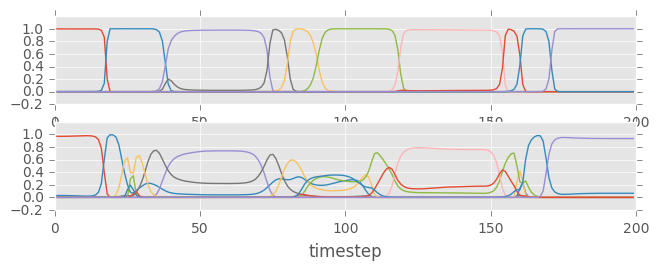

In [20]:
alpha, _, _, _, _ = model.compute_messages(demos_in[1], marginal=slice(0, 2))
obs_prob = model._B/np.sum(model._B, axis=0)

fig, ax = plt.subplots(nrows=2)
fig.set_size_inches(7.5,2.5)

ax[0].plot(alpha.T, lw=1);
ax[1].plot(obs_prob.T , lw=1);

[ax[i].set_ylim([-0.2, 1.2]) for i in range(2)]
plt.xlabel('timestep');

In [21]:
mu_est, sigma_est = model.condition(demos_in[1], dim_in=slice(0, 2), dim_out=slice(2, 4))
mu_est_gmm, sigma_est_gmm = model.condition(demos_in[1], dim_in=slice(0, 2), dim_out=slice(2, 4), gmm=True)

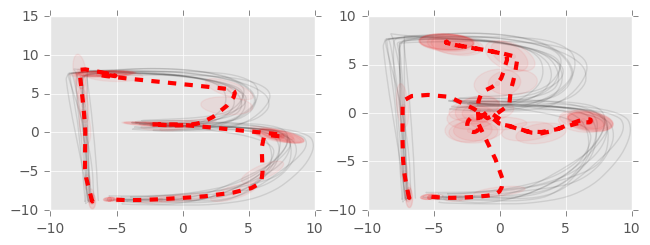

In [22]:
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(7.5, 2.5)

for p_in, p_out in zip(demos_in, demos_out):
    ax[0].plot(p_out[:, 0], p_out[:, 1],'k', alpha=0.1)
    ax[1].plot(p_out[:, 0], p_out[:, 1],'k', alpha=0.1)
    

ax[0].plot(mu_est[:, 0], mu_est[:,1 ], 'r--', lw=3)
ax[1].plot(mu_est_gmm[:, 0], mu_est_gmm[:,1 ], 'r--', lw=3)

pbd.plot_gmm(mu_est[::5], sigma_est[::5], ax=ax[0], swap=True, alpha=0.05)
pbd.plot_gmm(mu_est_gmm[::5], sigma_est_gmm[::5], ax=ax[1], swap=True, alpha=0.05)